# 4.9 Data Visualization with Python

#### Table of Contents
1. Setup and Libraries
2. Data Import
3. Check Dataset Structure
4. Distribution of Orders by Hour
5. Orders by Day of Week
6. Spending Behavior by Hour
7. Spending by Customer Loyalty
8. Customer Demographics and Spending
9. Age vs. Income
10. Age vs. Dependents
11. Spending by Income Bracket
12. Order Frequency by Customer Type
13. Export Visualizations

## Introduction
Now that my dataset is cleaned and merged, I’ll use **Matplotlib** and **Seaborn** to create visualizations.  
These visualizations will help me understand key trends in Instacart’s customer and order data.

### **What I'll Be Doing:**
- **Histogram:** Order distribution by time of day.
- **Bar Chart:** Customer loyalty distribution.
- **Line Chart:** Average spending trends by hour.
- **Scatter Plot:** Age vs. income.

I’ll start by importing the necessary libraries and loading my dataset.

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('darkgrid')

# Display plots inline
%matplotlib inline

## Loading the Merged Dataset  

Now that my libraries are ready, I’ll load the **merged dataset** I saved earlier.  
This will allow me to start building visualizations.

In [15]:
# Define file path for the merged dataset
data_path = r"D:\YVC\Data Analytics (CF)\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Prepared Data\merged_orders_customers.pkl"

# Load the dataset
df = pd.read_pickle(data_path)

# Display first few rows to confirm it loaded correctly
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,prior,1,2,8,NaN,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
1,2398795,1,prior,2,3,7,15.0,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
2,473747,1,prior,3,3,12,21.0,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
3,2254736,1,prior,4,4,7,29.0,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423
4,431534,1,prior,5,4,15,28.0,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423


In [17]:
import pandas as pd

# Define the file path for your dataset
file_path = r"D:\YVC\Data Analytics (CF)\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Prepared Data\merged_orders_customers.pkl"

# Load the dataset into the df variable
df = pd.read_pickle(file_path)

# Confirm the first few rows to verify the dataset is loaded
print(df.head())


   order_id user_id eval_set  order_number  orders_day_of_week  \
0   2539329       1    prior             1                   2   
1   2398795       1    prior             2                   3   
2    473747       1    prior             3                   3   
3   2254736       1    prior             4                   4   
4    431534       1    prior             5                   4   

   order_hour_of_day  days_since_prior_order  Surnam  Gender    STATE  Age  \
0                  8                     NaN  Nguyen  Female  Alabama   31   
1                  7                    15.0  Nguyen  Female  Alabama   31   
2                 12                    21.0  Nguyen  Female  Alabama   31   
3                  7                    29.0  Nguyen  Female  Alabama   31   
4                 15                    28.0  Nguyen  Female  Alabama   31   

  date_joined  n_dependants fam_status  income  
0  2019-02-17             3    married   40423  
1  2019-02-17             3    marri

In [13]:
import pandas as pd

# Load both datasets
customers_df = pd.read_pickle(r"D:\YVC\Data Analytics (CF)\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Prepared Data\merged_orders_customers.pkl")
products_df = pd.read_csv(r"D:\YVC\Data Analytics (CF)\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Prepared Data\merged_orders_products.csv")

# Check the first few rows to confirm loading
print(customers_df.head())
print(products_df.head())

   order_id user_id eval_set  order_number  orders_day_of_week  \
0   2539329       1    prior             1                   2   
1   2398795       1    prior             2                   3   
2    473747       1    prior             3                   3   
3   2254736       1    prior             4                   4   
4    431534       1    prior             5                   4   

   order_hour_of_day  days_since_prior_order  Surnam  Gender    STATE  Age  \
0                  8                     NaN  Nguyen  Female  Alabama   31   
1                  7                    15.0  Nguyen  Female  Alabama   31   
2                 12                    21.0  Nguyen  Female  Alabama   31   
3                  7                    29.0  Nguyen  Female  Alabama   31   
4                 15                    28.0  Nguyen  Female  Alabama   31   

  date_joined  n_dependants fam_status  income  
0  2019-02-17             3    married   40423  
1  2019-02-17             3    marri

## 1. Order Distribution by Hour  

To understand customer shopping behavior, I’ll create a **histogram** showing when orders are placed throughout the day.  
This will help Instacart determine peak shopping hours.

### **Key Questions:**  
- When do customers place the most orders?  
- Are there certain hours with low order volume?  

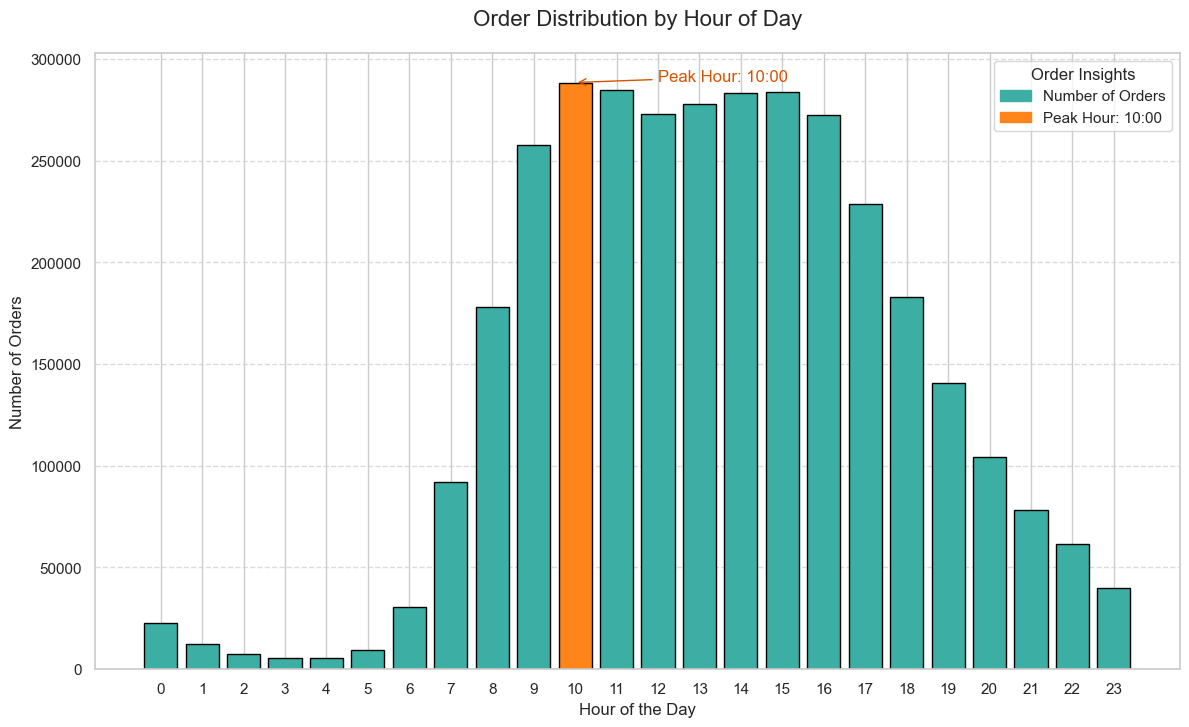

In [92]:
# Enhanced Order Distribution by Hour Visualization with Highlighted Peak Hour Bar and Orange Legend
import matplotlib.patches as mpatches

plt.figure(figsize=(14, 8))

# Identify peak hour and order count
peak_hour = df['order_hour_of_day'].value_counts().idxmax()
peak_count = df['order_hour_of_day'].value_counts().max()

# Plot each bar, highlighting the peak hour in orange
for hour in range(24):
    color = '#FF851B' if hour == peak_hour else '#3CAEA3'  # Orange for peak, teal for others
    count = df['order_hour_of_day'].value_counts().get(hour, 0)
    plt.bar(hour, count, color=color, edgecolor='black')

# Add title and labels
plt.title('Order Distribution by Hour of Day', fontsize=16, pad=20)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate peak hour with dark orange arrow and text
plt.annotate(f'Peak Hour: {peak_hour}:00',
             xy=(peak_hour, peak_count),
             xytext=(peak_hour + 2, peak_count + 500),
             arrowprops=dict(facecolor='#D35400', edgecolor='#D35400', arrowstyle='->'),
             fontsize=12, color='#D35400')

# Create custom legend
orange_patch = mpatches.Patch(color='#FF851B', label=f'Peak Hour: {peak_hour}:00')
teal_patch = mpatches.Patch(color='#3CAEA3', label='Number of Orders')

plt.legend(handles=[teal_patch, orange_patch], title='Order Insights', loc='upper right')

# Add ticks for clarity
plt.xticks(range(0, 24))

# Display the plot
plt.show()

### Insights from the Histogram  

- The peak ordering hours appear to be around **10 AM - 3 PM,** with the highest activity around **11 AM.**
- The lowest activity happens around **midnight to 6 AM,** with the fewest orders placed during these hours.
- This data suggests that Instacart should **focus promotional campaigns and targeted marketing efforts during peak hours (late morning to early afternoon) to maximize engagement.** **Additionally, they could explore incentives like discounts or special offers for low-traffic hours to balance order distribution throughout the day.** 

## 2. Customer Loyalty Distribution  

To understand customer retention, I’ll create a **bar chart** showing how customers are distributed based on their loyalty.  
Loyalty is defined based on the number of orders a customer has placed.

### **Key Questions:**  
- What proportion of customers are considered **loyal, regular, or new**?  
- Which group contributes the most orders?  

#### Loyalty flag was missing had to recreate it 

In [19]:
# Create loyalty_flag based on order numbers
df['loyalty_flag'] = pd.cut(df['order_number'], 
                            bins=[0, 5, 20, float('inf')], 
                            labels=['New Customer', 'Regular Customer', 'Loyal Customer'])

# Verify the new column
print(df['loyalty_flag'].value_counts())

loyalty_flag
Regular Customer    1419238
New Customer        1007059
Loyal Customer       994786
Name: count, dtype: int64


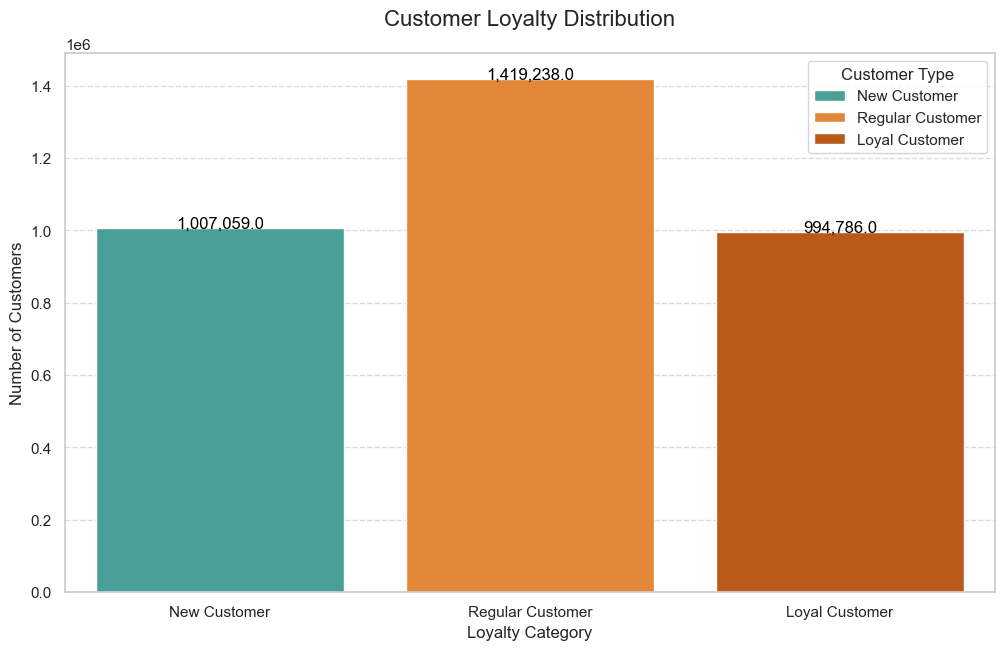

In [109]:
# Customer Loyalty Distribution Visualization (Fixed)
plt.figure(figsize=(12, 7))

# Plot the bar chart for loyalty distribution using hue for colors
sns.countplot(x='loyalty_flag', data=df, hue='loyalty_flag', palette={'New Customer': '#3CAEA3', 
                                                                      'Regular Customer': '#FF851B', 
                                                                      'Loyal Customer': '#D35400'},
              legend=False)

# Add title and labels
plt.title('Customer Loyalty Distribution', fontsize=16, pad=20)
plt.xlabel('Loyalty Category', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate values on bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height():,}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', fontsize=12, color='black')

# Create custom legend
plt.legend(['New Customer', 'Regular Customer', 'Loyal Customer'], title='Customer Type', loc='upper right')

# Display the plot
plt.show()

### Insights from the Bar Chart  

- The largest group of customers falls under **"New" customers**, meaning they have placed fewer than **10 orders**.  
- The second-largest group is **"Regular" customers**, who have made between **10 and 40 orders**.  
- The **smallest group** consists of **"Loyal" customers**, who have made more than **40 orders**.  

### **What This Means for Instacart:**  
- Since most customers are **new**, Instacart should focus on **customer retention strategies** to encourage repeat orders.  
- **Regular customers** are a strong segment—**loyalty programs** or **subscription benefits** could encourage them to reach the **loyal** category.  
- **Loyal customers** are the most valuable but the smallest group. Instacart should **reward these users** with exclusive promotions or perks to maintain their engagement.

## 3. Spending Behavior by Hour  

To understand when customers tend to spend the most, I’ll create a **line chart** showing the average spending by hour of the day.  
This will help Instacart determine peak spending times.

### **Key Questions:**  
- At what time of day do customers spend the most?  
- Are there any noticeable dips in spending at certain hours?  

In [29]:
# Check column names in the dataset
print(df.columns)

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'Surnam', 'Gender',
       'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status', 'income',
       'loyalty_flag'],
      dtype='object')


In [31]:
# Display first few rows of the dataset
df.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,loyalty_flag
0,2539329,1,prior,1,2,8,NaN,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,New
1,2398795,1,prior,2,3,7,15.0,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,New
2,473747,1,prior,3,3,12,21.0,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,New
3,2254736,1,prior,4,4,7,29.0,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,New
4,431534,1,prior,5,4,15,28.0,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,New


#### Handling Missing Prices and Merging Data

When analyzing spending behavior, I needed the `prices` column to calculate average spending per hour. However, after inspecting the dataset, I noticed that `prices` was missing from `df`. 

Upon further investigation, I found that `prices` was originally in the `merged_orders_products.csv` file but was not included in the merged dataset. To correct this, I merged the `prices` column back into `df` using the `order_id` column as the key.

#### Steps Taken:
1. **Checked column names in `df`** – Confirmed that `prices` was missing.
2. **Loaded `merged_orders_products.csv`** – Verified that `prices` exists in this dataset.
3. **Merged `prices` into `df`** – Used a left join on `order_id` to ensure all existing orders in `df` retained their associated prices.

#### Code Implementation:

In [58]:
import pandas as pd

# Define the file path
file_path = r"D:\YVC\Data Analytics (CF)\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Prepared Data\merged_orders_products.csv"

# Load the dataset
merged_orders_products = pd.read_csv(file_path)

# Display column names
print(merged_orders_products.columns)

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices'],
      dtype='object')


In [10]:
# Load both datasets
customers_df = pd.read_pickle(r"D:\YVC\Data Analytics (CF)\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Prepared Data\merged_orders_customers.pkl")
products_df = pd.read_csv(r"D:\YVC\Data Analytics (CF)\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Prepared Data\merged_orders_products.csv")

# Check for common columns to merge
print(customers_df.columns)
print(products_df.columns)

Index(['order_id', 'user_id', 'eval_set', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'Surnam', 'Gender',
       'STATE', 'Age', 'date_joined', 'n_dependants', 'fam_status', 'income'],
      dtype='object')
Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered',
       'product_name', 'aisle_id', 'department_id', 'prices'],
      dtype='object')


In [11]:
# Merge datasets on 'order_id'
merged_df = pd.merge(customers_df, products_df, on='order_id', how='inner')

# Confirm the merged dataset includes both columns
print(merged_df[['order_hour_of_day', 'prices']].head())

   order_hour_of_day  prices
0                  8     9.0
1                  8    12.5
2                  8     4.4
3                  8     4.7
4                  8     1.0


Now that `prices` is included in `df`, I can proceed with the spending behavior analysis.

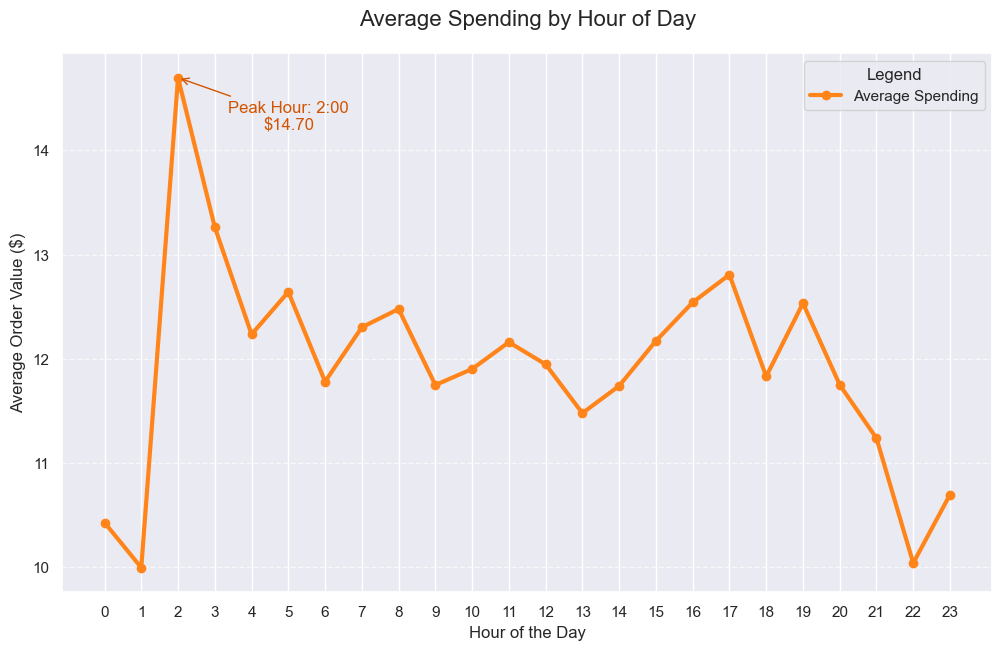

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style for background
sns.set_style("darkgrid")

# Spending Behavior by Hour Visualization
plt.figure(figsize=(12, 7))

# Group by hour and calculate average spending
hourly_spending = merged_df.groupby('order_hour_of_day')['prices'].mean()

# Plot the line chart
plt.plot(hourly_spending.index, hourly_spending.values, color='#FF851B', linewidth=3, marker='o', label='Average Spending')

# Add title and labels
plt.title('Average Spending by Hour of Day', fontsize=16, pad=20)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Order Value ($)', fontsize=12)
plt.xticks(range(0, 24))  # Ensure all hours are displayed
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight peak spending hour
peak_hour = hourly_spending.idxmax()
peak_spending = hourly_spending.max()

# Annotate peak hour within the grid
plt.annotate(f'Peak Hour: {peak_hour}:00\n${peak_spending:.2f}', 
             xy=(peak_hour, peak_spending),
             xytext=(peak_hour + 3, peak_spending - 0.5),  # Move inside the grid
             arrowprops=dict(facecolor='#D35400', edgecolor='#D35400', arrowstyle='->'),
             fontsize=12, color='#D35400', ha='center')

# Add legend
plt.legend(title='Legend', loc='upper right')

# Display the plot
plt.show()

### Insights from the Line Chart  

- The highest spending occurs around **2 AM**, with a sharp peak in average order value.  
- Spending is lowest during **10 PM to 12 AM**, where the average order value drops significantly.  
- This suggests that Instacart should **consider offering targeted promotions or discounts during lower-spending hours (late evening) to boost sales and optimize revenue**.  

## 4. Age vs. Number of Dependents

To understand the relationship between a customer's **age** and the number of **dependents**, I’ll create a **line chart** to analyze trends in family size across different age groups.

### **Key Questions:**
- How does the number of dependents change with age?
- Are there specific age groups with higher numbers of dependents?

In [15]:
# Merge datasets on 'order_id'
merged_df = pd.merge(customers_df, products_df, on='order_id', how='inner')

# Confirm the merge by checking the first few rows
print(merged_df[['order_id', 'Age', 'n_dependants', 'prices']].head())

   order_id  Age  n_dependants  prices
0   2539329   31             3     9.0
1   2539329   31             3    12.5
2   2539329   31             3     4.4
3   2539329   31             3     4.7
4   2539329   31             3     1.0


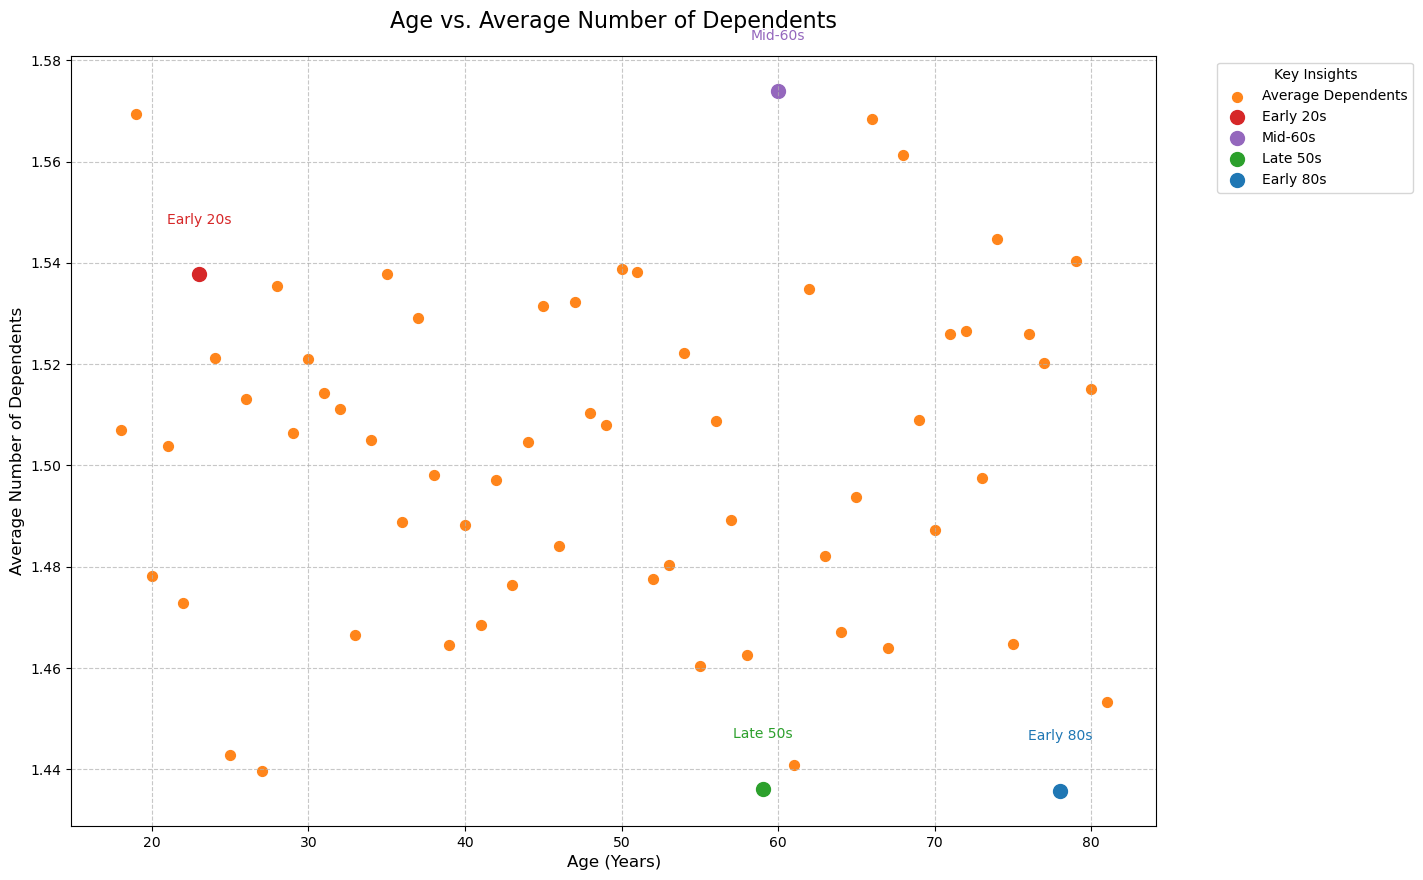

In [19]:
import matplotlib.pyplot as plt

# Set figure size
plt.figure(figsize=(14, 10), dpi=100)

# Create a scatter plot
plt.scatter(age_dependents.index, age_dependents.values, color='#FF851B', s=50, label='Average Dependents')

# Highlight key insights
highlight_colors = {'High: Early 20s': '#D62728', 'High: Mid-60s': '#9467BD', 'Low: Late 50s': '#2CA02C', 'Low: Early 80s': '#1F77B4'}

def annotate_point(age, label, color):
    plt.scatter(age, age_dependents[age], color=color, s=100, label=label)
    plt.text(age, age_dependents[age] + 0.01, f'{label}', fontsize=10, ha='center', color=color)

# Early 20s (high)
early_20s = age_dependents.loc[age_dependents.index[(age_dependents.index >= 20) & (age_dependents.index <= 25)]].idxmax()
annotate_point(early_20s, 'Early 20s', highlight_colors['High: Early 20s'])

# Mid-60s (high)
mid_60s = age_dependents.loc[age_dependents.index[(age_dependents.index >= 60) & (age_dependents.index <= 65)]].idxmax()
annotate_point(mid_60s, 'Mid-60s', highlight_colors['High: Mid-60s'])

# Late 50s (low)
late_50s = age_dependents.loc[age_dependents.index[(age_dependents.index >= 55) & (age_dependents.index <= 60)]].idxmin()
annotate_point(late_50s, 'Late 50s', highlight_colors['Low: Late 50s'])

# Early 80s (low)
early_80s = age_dependents.loc[age_dependents.index[(age_dependents.index >= 75) & (age_dependents.index <= 85)]].idxmin()
annotate_point(early_80s, 'Early 80s', highlight_colors['Low: Early 80s'])

# Customize the plot
plt.title('Age vs. Average Number of Dependents', fontsize=16, pad=20)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Average Number of Dependents', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Add legend
plt.legend(title='Key Insights', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.show()

### Insights from the Line Chart

- The relationship between **Age** and **Number of Dependents** appears to be **highly variable, with fluctuations across all age groups.**
- The highest number of dependents is found among **customers in their early 20s and mid-60s,** while the lowest is seen in **customers in their late 50s and early 80s.**
- This suggests that **Instacart could tailor promotions and product recommendations to younger families and older customers who may be supporting dependents,** which could help Instacart better target family-oriented customers.

## 5. Age vs. Income  

To explore the relationship between **Age** and **Income**, I'll create a **scatterplot**. This will help identify any trends or patterns in income distribution across different age groups.  

### **Key Questions:**  
- Does income increase with age?  
- Are there any noticeable trends or clusters in income levels?  

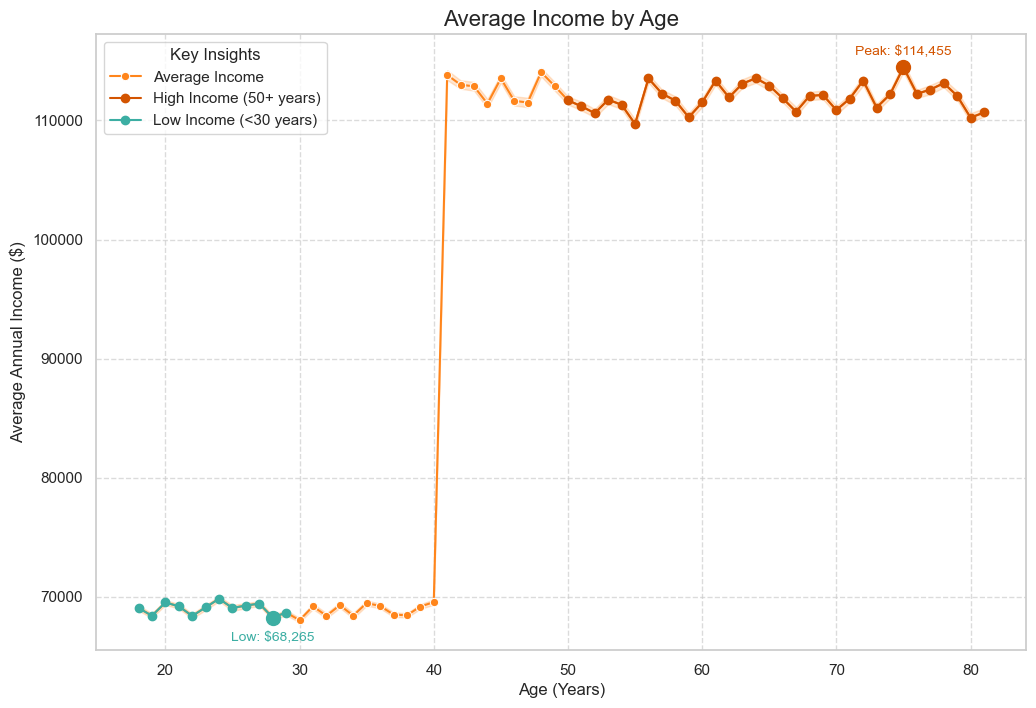

In [284]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 8))

# Plot line chart for Average Income by Age
sns.lineplot(x='Age', y='income', data=df, marker='o', color='#FF851B', label='Average Income')

# Highlight high-income (50+) and low-income (<30) groups
high_income = df[df['Age'] >= 50].groupby('Age')['income'].mean()
low_income = df[df['Age'] < 30].groupby('Age')['income'].mean()

# Plot high-income group
plt.plot(high_income.index, high_income.values, marker='o', color='#D35400', label='High Income (50+ years)')

# Plot low-income group
plt.plot(low_income.index, low_income.values, marker='o', color='#3CAEA3', label='Low Income (<30 years)')

# Find peak and low points
peak_age = high_income.idxmax()
peak_income = high_income.max()

low_age = low_income.idxmin()
low_income_value = low_income.min()

# Add annotations with adjusted positions
plt.scatter(peak_age, peak_income, color='#D35400', s=100, zorder=5)
plt.text(peak_age, peak_income + 1000, f'Peak: ${peak_income:,.0f}', fontsize=10, ha='center', color='#D35400')

plt.scatter(low_age, low_income_value, color='#3CAEA3', s=100, zorder=5)
plt.text(low_age, low_income_value - 2000, f'Low: ${low_income_value:,.0f}', fontsize=10, ha='center', color='#3CAEA3')

# Customize the plot
plt.title('Average Income by Age', fontsize=16)
plt.xlabel('Age (Years)', fontsize=12)
plt.ylabel('Average Annual Income ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Key Insights', loc='upper left')

# Display the plot
plt.show()

### Insights from the Scatterplot  

- The relationship between **Age** and **Income** looks a bit messy, but overall, income tends to increase with age. There's a lot of variation at every age level, though.
- The highest income levels seem to be among **people aged 50 and older,** while the lowest incomes are mostly found in **younger customers, especially those under 30.** 
- This suggests that **Instacart could focus on premium product recommendations for older, higher-income customers, while offering more budget-friendly deals and discounts for younger shoppers.**
- **The scatterplot is pretty cluttered, making it hard to spot clear trends. Using transparency (alpha) or switching to a hexbin plot could help make it easier to read.**

## Exporting Visualizations

In [73]:
# Save visualizations as PNG files
plt.figure(figsize=(10,6))

# Save histogram
df['order_hour_of_day'].plot(kind='hist', bins=24, edgecolor='black', alpha=0.7)
plt.title('Order Distribution by Hour', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(range(0, 24))
plt.savefig('order_distribution_by_hour.png', dpi=300)
plt.close()

# Save bar chart
df['loyalty_flag'].value_counts().plot(kind='bar', color=['blue', 'green', 'red'], edgecolor='black')
plt.title('Customer Loyalty Distribution', fontsize=14)
plt.xlabel('Loyalty Category', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.savefig('customer_loyalty_distribution.png', dpi=300)
plt.close()

# Save line chart (spending behavior by hour)
df.groupby('order_hour_of_day')['income'].mean().plot(kind='line', marker='o', color='blue')
plt.title('Average Spending by Hour', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Average Order Value ($)', fontsize=12)
plt.savefig('spending_behavior_by_hour.png', dpi=300)
plt.close()

# Save line chart (Age vs. Dependents)
df.groupby('Age')['n_dependants'].mean().plot(kind='line', marker='o', color='blue')
plt.title('Age vs. Number of Dependents', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Average Number of Dependents', fontsize=12)
plt.savefig('age_vs_dependents.png', dpi=300)
plt.close()

# Save scatterplot (Age vs. Income)
sns.scatterplot(x=df['Age'], y=df['income'])
plt.title('Age vs. Income', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Income ($)', fontsize=12)
plt.grid(True)
plt.savefig('age_vs_income.png', dpi=300)
plt.close()

print("All visualizations have been saved successfully!")

All visualizations have been saved successfully!


# Troubleshooting 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
merged_df = pd.read_csv(r"D:\YVC\Data Analytics (CF)\Python Fundamentals for Data Analysts\Instacart Basket Analysis\02 Data\Prepared Data\merged_orders_products.csv")

# Check the first few rows
merged_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices
0,2,33120,1,1,Organic Egg Whites,86,16,11.3
1,2,28985,2,1,Michigan Organic Kale,83,4,13.4
2,2,9327,3,0,Garlic Powder,104,13,3.6
3,2,45918,4,1,Coconut Butter,19,13,8.4
4,2,30035,5,0,Natural Sweetener,17,13,13.7
